In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

### Description of data: 
Every participant has one file 1d array with 400 rows (each corresponding to a node) for each of the following conditions: 
<ul>
    <li>C1 = low interference, easy search</li>
    <li>C2 = low interference, hard search</li>
    <li>C3 = high interference, easy search</li>
    <li>C4 = high interference, hard search</li>
</ul>

In [128]:
# Paths to access files
home_dir = "DistractWM/"
c1_path = "/graph_metrics/q_cond1_space.npy"
c2_path = "/graph_metrics/q_cond2_space.npy"
c3_path = "/graph_metrics/q_cond3_space.npy"
c4_path = "/graph_metrics/q_cond4_space.npy"

# ...
idx = 31 #102-132, total 27 participants (missing 111, 113, 127 and 128)

# Creat psudo-empty dataframe
df = pd.DataFrame(columns=['Interference', 'Att_Demand', 'Q'])

for x in range(idx): 
    
    name = 'sub-'
    num = 102 + x
    
    if(not((num == 111) or (num == 113) or (num == 127) or (num == 128))):
        
        name = name + str(num)
        full_path1 = home_dir + name + c1_path
        full_path2 = home_dir + name + c2_path
        full_path3 = home_dir + name + c3_path
        full_path4 = home_dir + name + c4_path
        
        # Loading data     
        c1 = np.load(full_path1) 
        c2 = np.load(full_path2) 
        c3 = np.load(full_path3) 
        c4 = np.load(full_path4) 
        
        # Interference labels 
        I1 = np.repeat(['low'], len(c1))
        I2 = np.repeat(['low'], len(c2))
        I3 = np.repeat(['high'], len(c3))
        I4 = np.repeat(['high'], len(c4))
        
        # Attentional Demand labels
        AD1 = np.repeat(['easy'], len(c1))
        AD2 = np.repeat(['hard'], len(c2))
        AD3 = np.repeat(['easy'], len(c3))
        AD4 = np.repeat(['hard'], len(c4))
    
        # Putting in dataframe format
        new_c1 = pd.DataFrame(data={'Interference': I1, 'Att_Demand': AD1, 'Q': c1}, index=range(len(c1)))
        new_c2 = pd.DataFrame(data={'Interference': I2, 'Att_Demand': AD2, 'Q': c2}, index=range(len(c2)))
        new_c3 = pd.DataFrame(data={'Interference': I3, 'Att_Demand': AD3, 'Q': c3}, index=range(len(c3)))
        new_c4 = pd.DataFrame(data={'Interference': I4, 'Att_Demand': AD4, 'Q': c4}, index=range(len(c4)))
        
        # Appending data to df
        df = df.append(new_c1, ignore_index = True)
        df = df.append(new_c2, ignore_index = True)
        df = df.append(new_c3, ignore_index = True)
        df = df.append(new_c4, ignore_index = True)

        
df.to_csv('GitHub/Summer_2021_fMRI/Formated_for_ANOVA.csv', sep='\t') 
df.head(15) # shape (43200, 3)

,Interference,Att_Demand,Q
0,low,easy,0.569228
1,low,easy,0.551409
2,low,easy,0.535820
3,low,easy,0.512543
4,low,easy,0.496776
5,low,easy,0.454853
6,low,easy,0.440480
7,low,easy,0.434916
8,low,easy,0.422712
9,low,easy,0.405839


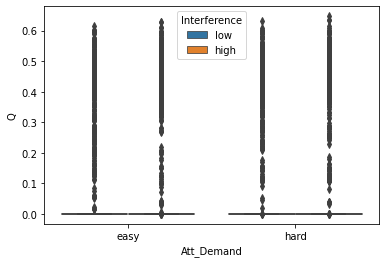

In [130]:
# Visualizing data 

ax = sns.boxplot(x="Att_Demand", y="Q", hue="Interference",
                 data=df)

##### Perform two-way ANOVA w/ interaction

In [131]:
model = ols('Q ~ C(Att_Demand) + C(Interference) + C(Att_Demand):C(Interference)', data=corrected_q).fit()
sm.stats.anova_lm(model, typ=2)


,sum_sq,df,F,PR(>F)
C(Att_Demand),0.018238,1.0,2.137728,0.144014
C(Interference),0.203051,1.0,23.800410,0.000001
C(Att_Demand):C(Interference),0.001918,1.0,0.224868,0.635454
Residual,8.940930,1048.0,NaN,NaN


##### Perform two-way ANOVA without interaction

In [132]:
model = ols('Q ~ C(Att_Demand) + C(Interference)', data=corrected_q).fit()
sm.stats.anova_lm(model, typ=2)


,sum_sq,df,F,PR(>F)
C(Att_Demand),0.018238,1.0,2.139309,0.143866
C(Interference),0.203051,1.0,23.818009,0.000001
Residual,8.942849,1049.0,NaN,NaN


# Same analysis but looking only at the first 10 rows/nodes

In [124]:
# Paths to access files
home_dir = "DistractWM/"
c1_path = "/graph_metrics/q_cond1_space.npy"
c2_path = "/graph_metrics/q_cond2_space.npy"
c3_path = "/graph_metrics/q_cond3_space.npy"
c4_path = "/graph_metrics/q_cond4_space.npy"

# ...
idx = 31 #102-132, total 27 participants (missing 111, 113, 127 and 128)

# Creat psudo-empty dataframe
df = pd.DataFrame(columns=['Interference', 'Att_Demand', 'Q'])

for x in range(idx): 
    
    name = 'sub-'
    num = 102 + x
    
    if(not((num == 111) or (num == 113) or (num == 127) or (num == 128))):
        
        name = name + str(num)
        full_path1 = home_dir + name + c1_path
        full_path2 = home_dir + name + c2_path
        full_path3 = home_dir + name + c3_path
        full_path4 = home_dir + name + c4_path
        
        # Loading data     
        c1 = np.load(full_path1) 
        c2 = np.load(full_path2) 
        c3 = np.load(full_path3) 
        c4 = np.load(full_path4) 
        
        c1 = c1[:11]
        c2 = c2[:11]
        c3 = c3[:11]
        c4 = c4[:11]
        
        # Interference labels 
        I1 = np.repeat(['low'], len(c1))
        I2 = np.repeat(['low'], len(c2))
        I3 = np.repeat(['high'], len(c3))
        I4 = np.repeat(['high'], len(c4))
        
        # Attentional Demand labels
        AD1 = np.repeat(['easy'], len(c1))
        AD2 = np.repeat(['hard'], len(c2))
        AD3 = np.repeat(['easy'], len(c3))
        AD4 = np.repeat(['hard'], len(c4))
    
        # Putting in dataframe format
        new_c1 = pd.DataFrame(data={'Interference': I1, 'Att_Demand': AD1, 'Q': c1}, index=range(len(c1)))
        new_c2 = pd.DataFrame(data={'Interference': I2, 'Att_Demand': AD2, 'Q': c2}, index=range(len(c2)))
        new_c3 = pd.DataFrame(data={'Interference': I3, 'Att_Demand': AD3, 'Q': c3}, index=range(len(c3)))
        new_c4 = pd.DataFrame(data={'Interference': I4, 'Att_Demand': AD4, 'Q': c4}, index=range(len(c4)))
        
        # Appending data to df
        df = df.append(new_c1, ignore_index = True)
        df = df.append(new_c2, ignore_index = True)
        df = df.append(new_c3, ignore_index = True)
        df = df.append(new_c4, ignore_index = True)
        
df.head(15) # shape (43200, 3)

,Interference,Att_Demand,Q
0,low,easy,0.569228
1,low,easy,0.551409
2,low,easy,0.535820
3,low,easy,0.512543
4,low,easy,0.496776
5,low,easy,0.454853
6,low,easy,0.440480
7,low,easy,0.434916
8,low,easy,0.422712
9,low,easy,0.405839


In [ ]:
# This code was used to filter values (not currently used)

#mins_q = df[df.Q < 0.1]
#mins_q

#corrected_q = df[df.Q > 0.2]
#corrected_q

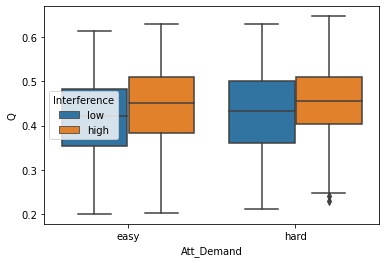

In [125]:
# Visualizing data 
ax = sns.boxplot(x="Att_Demand", y="Q", hue="Interference",
                 data=corrected_q)

##### Perform two-way ANOVA w/ interaction

In [126]:
model = ols('Q ~ C(Att_Demand) + C(Interference) + C(Att_Demand):C(Interference)', data=corrected_q).fit()
sm.stats.anova_lm(model, typ=2)


,sum_sq,df,F,PR(>F)
C(Att_Demand),0.018238,1.0,2.137728,0.144014
C(Interference),0.203051,1.0,23.800410,0.000001
C(Att_Demand):C(Interference),0.001918,1.0,0.224868,0.635454
Residual,8.940930,1048.0,NaN,NaN


##### Perform two-way ANOVA without interaction

In [127]:
model = ols('Q ~ C(Att_Demand) + C(Interference)', data=corrected_q).fit()
sm.stats.anova_lm(model, typ=2)


,sum_sq,df,F,PR(>F)
C(Att_Demand),0.018238,1.0,2.139309,0.143866
C(Interference),0.203051,1.0,23.818009,0.000001
Residual,8.942849,1049.0,NaN,NaN


### Examining Q for C1

In [133]:

s1_c1_q = np.load("DistractWM/sub-102/graph_metrics/q_cond1_space.npy") 
s2_c1_q = np.load("DistractWM/sub-103/graph_metrics/q_cond1_space.npy") 
s3_c1_q = np.load("DistractWM/sub-104/graph_metrics/q_cond1_space.npy") 
s4_c1_q = np.load("DistractWM/sub-105/graph_metrics/q_cond1_space.npy") 
s5_c1_q = np.load("DistractWM/sub-106/graph_metrics/q_cond1_space.npy") 
s6_c1_q = np.load("DistractWM/sub-107/graph_metrics/q_cond1_space.npy") 
s7_c1_q = np.load("DistractWM/sub-108/graph_metrics/q_cond1_space.npy") 
s8_c1_q = np.load("DistractWM/sub-109/graph_metrics/q_cond1_space.npy") 
s9_c1_q = np.load("DistractWM/sub-110/graph_metrics/q_cond1_space.npy") 
s10_c1_q = np.load("DistractWM/sub-112/graph_metrics/q_cond1_space.npy") 

s11_c1_q = np.load("DistractWM/sub-114/graph_metrics/q_cond1_space.npy") 
s12_c1_q = np.load("DistractWM/sub-115/graph_metrics/q_cond1_space.npy") 
s13_c1_q = np.load("DistractWM/sub-116/graph_metrics/q_cond1_space.npy") 
s14_c1_q = np.load("DistractWM/sub-117/graph_metrics/q_cond1_space.npy") 
s15_c1_q = np.load("DistractWM/sub-118/graph_metrics/q_cond1_space.npy") 
s16_c1_q = np.load("DistractWM/sub-119/graph_metrics/q_cond1_space.npy") 
s17_c1_q = np.load("DistractWM/sub-120/graph_metrics/q_cond1_space.npy") 
s18_c1_q = np.load("DistractWM/sub-121/graph_metrics/q_cond1_space.npy") 
s19_c1_q = np.load("DistractWM/sub-122/graph_metrics/q_cond1_space.npy") 
s20_c1_q = np.load("DistractWM/sub-123/graph_metrics/q_cond1_space.npy") 

s21_c1_q = np.load("DistractWM/sub-124/graph_metrics/q_cond1_space.npy") 
s22_c1_q = np.load("DistractWM/sub-125/graph_metrics/q_cond1_space.npy") 
s23_c1_q = np.load("DistractWM/sub-126/graph_metrics/q_cond1_space.npy") 
s24_c1_q = np.load("DistractWM/sub-129/graph_metrics/q_cond1_space.npy") 
s25_c1_q = np.load("DistractWM/sub-130/graph_metrics/q_cond1_space.npy") 
s26_c1_q = np.load("DistractWM/sub-131/graph_metrics/q_cond1_space.npy") 
s27_c1_q = np.load("DistractWM/sub-132/graph_metrics/q_cond1_space.npy") 

c1_q = pd.DataFrame(data={"Q1": s1_c1_q, "Q2": s2_c1_q, "Q3": s3_c1_q, "Q4": s4_c1_q, "Q5": s5_c1_q,
                         "Q6": s6_c1_q, "Q7": s7_c1_q, "Q8": s8_c1_q, "Q9": s9_c1_q, "Q10": s10_c1_q,
                         "Q11": s6_c1_q, "Q12": s7_c1_q, "Q13": s8_c1_q, "Q14": s9_c1_q, "Q15": s10_c1_q,
                         "Q16": s6_c1_q, "Q17": s7_c1_q, "Q18": s8_c1_q, "Q19": s9_c1_q, "Q20": s10_c1_q,
                         "Q21": s6_c1_q, "Q22": s7_c1_q, "Q23": s8_c1_q, "Q24": s9_c1_q, "Q25": s10_c1_q,
                         "Q26": s6_c1_q, "Q27": s7_c1_q}, index=range(len(s1_c1_q)))

c1_q.to_csv('GitHub/Summer_2021_fMRI/All_Qs_C1.csv', sep='\t')
c1_q.head(15)

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27
0,0.569228,0.423376,0.533194,0.567252,0.601743,0.572075,0.514683,0.596339,0.492345,0.521292,...,0.596339,0.492345,0.521292,0.572075,0.514683,0.596339,0.492345,0.521292,0.572075,0.514683
1,0.551409,0.401123,0.504241,0.534193,0.575328,0.547802,0.485918,0.567136,0.457986,0.478663,...,0.567136,0.457986,0.478663,0.547802,0.485918,0.567136,0.457986,0.478663,0.547802,0.485918
2,0.535820,0.389680,0.479184,0.518939,0.549678,0.518348,0.465407,0.533838,0.453467,0.444791,...,0.533838,0.453467,0.444791,0.518348,0.465407,0.533838,0.453467,0.444791,0.518348,0.465407
3,0.512543,0.375739,0.457013,0.494371,0.522294,0.495758,0.444494,0.504988,0.310434,0.420303,...,0.504988,0.310434,0.420303,0.495758,0.444494,0.504988,0.310434,0.420303,0.495758,0.444494
4,0.496776,0.359957,0.438687,0.480218,0.476184,0.464170,0.421972,0.492417,0.308532,0.396125,...,0.492417,0.308532,0.396125,0.464170,0.421972,0.492417,0.308532,0.396125,0.464170,0.421972
5,0.454853,0.341766,0.418978,0.463485,0.458155,0.446588,0.411464,0.458356,0.288930,0.382540,...,0.458356,0.288930,0.382540,0.446588,0.411464,0.458356,0.288930,0.382540,0.446588,0.411464
6,0.440480,0.324969,0.353507,0.450963,0.443191,0.429101,0.405748,0.428743,0.277193,0.084555,...,0.428743,0.277193,0.084555,0.429101,0.405748,0.428743,0.277193,0.084555,0.429101,0.405748
7,0.434916,0.314505,0.340362,0.428025,0.426610,0.410106,0.393896,0.412884,0.280631,0.075040,...,0.412884,0.280631,0.075040,0.410106,0.393896,0.412884,0.280631,0.075040,0.410106,0.393896
8,0.422712,0.307972,0.319536,0.408398,0.413275,0.393819,0.380208,0.398471,0.268072,0.014767,...,0.398471,0.268072,0.014767,0.393819,0.380208,0.398471,0.268072,0.014767,0.393819,0.380208
9,0.405839,0.306575,0.310160,0.399422,0.399946,0.380595,0.254333,0.385817,0.262933,0.016715,...,0.385817,0.262933,0.016715,0.380595,0.254333,0.385817,0.262933,0.016715,0.380595,0.254333


### Examining Q for C2

In [134]:
s1_c2_q = np.load("DistractWM/sub-102/graph_metrics/q_cond2_space.npy") 
s2_c2_q = np.load("DistractWM/sub-103/graph_metrics/q_cond2_space.npy") 
s3_c2_q = np.load("DistractWM/sub-104/graph_metrics/q_cond2_space.npy") 
s4_c2_q = np.load("DistractWM/sub-105/graph_metrics/q_cond2_space.npy") 
s5_c2_q = np.load("DistractWM/sub-106/graph_metrics/q_cond2_space.npy") 
s6_c2_q = np.load("DistractWM/sub-107/graph_metrics/q_cond2_space.npy") 
s7_c2_q = np.load("DistractWM/sub-108/graph_metrics/q_cond2_space.npy") 
s8_c2_q = np.load("DistractWM/sub-109/graph_metrics/q_cond2_space.npy") 
s9_c2_q = np.load("DistractWM/sub-110/graph_metrics/q_cond2_space.npy") 
s10_c2_q = np.load("DistractWM/sub-112/graph_metrics/q_cond2_space.npy") 

s11_c2_q = np.load("DistractWM/sub-114/graph_metrics/q_cond2_space.npy") 
s12_c2_q = np.load("DistractWM/sub-115/graph_metrics/q_cond2_space.npy") 
s13_c2_q = np.load("DistractWM/sub-116/graph_metrics/q_cond2_space.npy") 
s14_c2_q = np.load("DistractWM/sub-117/graph_metrics/q_cond2_space.npy") 
s15_c2_q = np.load("DistractWM/sub-118/graph_metrics/q_cond2_space.npy") 
s16_c2_q = np.load("DistractWM/sub-119/graph_metrics/q_cond2_space.npy") 
s17_c2_q = np.load("DistractWM/sub-120/graph_metrics/q_cond2_space.npy") 
s18_c2_q = np.load("DistractWM/sub-121/graph_metrics/q_cond2_space.npy") 
s19_c2_q = np.load("DistractWM/sub-122/graph_metrics/q_cond2_space.npy") 
s20_c2_q = np.load("DistractWM/sub-123/graph_metrics/q_cond2_space.npy") 

s21_c2_q = np.load("DistractWM/sub-124/graph_metrics/q_cond2_space.npy") 
s22_c2_q = np.load("DistractWM/sub-125/graph_metrics/q_cond2_space.npy") 
s23_c2_q = np.load("DistractWM/sub-126/graph_metrics/q_cond2_space.npy") 
s24_c2_q = np.load("DistractWM/sub-129/graph_metrics/q_cond2_space.npy") 
s25_c2_q = np.load("DistractWM/sub-130/graph_metrics/q_cond2_space.npy") 
s26_c2_q = np.load("DistractWM/sub-131/graph_metrics/q_cond2_space.npy") 
s27_c2_q = np.load("DistractWM/sub-132/graph_metrics/q_cond2_space.npy") 

c2_q = pd.DataFrame(data={"Q1": s1_c2_q, "Q2": s2_c2_q, "Q3": s3_c2_q, "Q4": s4_c2_q, "Q5": s5_c2_q,
                         "Q6": s6_c2_q, "Q7": s7_c2_q, "Q8": s8_c2_q, "Q9": s9_c2_q, "Q10": s10_c2_q,
                         "Q11": s6_c2_q, "Q12": s7_c2_q, "Q13": s8_c2_q, "Q14": s9_c2_q, "Q15": s10_c2_q,
                         "Q16": s6_c2_q, "Q17": s7_c2_q, "Q18": s8_c2_q, "Q19": s9_c2_q, "Q20": s10_c2_q,
                         "Q21": s6_c2_q, "Q22": s7_c2_q, "Q23": s8_c2_q, "Q24": s9_c2_q, "Q25": s10_c2_q,
                         "Q26": s6_c2_q, "Q27": s7_c2_q}, index=range(len(s1_c1_q)))

c2_q.to_csv('GitHub/Summer_2021_fMRI/All_Qs_C2.csv', sep='\t')
c2_q.head(15)

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27
0,0.549051,3.988681e-01,0.528943,0.590762,0.630504,0.487314,0.598705,0.595131,0.540264,0.577858,...,0.595131,0.540264,0.577858,0.487314,0.598705,0.595131,0.540264,0.577858,0.487314,0.598705
1,0.525387,3.840982e-01,0.504329,0.552438,0.592571,0.456817,0.574155,0.559715,0.521096,0.545114,...,0.559715,0.521096,0.545114,0.456817,0.574155,0.559715,0.521096,0.545114,0.456817,0.574155
2,0.498369,3.756898e-01,0.482502,0.535276,0.561544,0.273853,0.549098,0.519421,0.498946,0.522534,...,0.519421,0.498946,0.522534,0.273853,0.549098,0.519421,0.498946,0.522534,0.273853,0.549098
3,0.471613,3.619102e-01,0.456077,0.508148,0.547207,0.275126,0.522736,0.493744,0.411037,0.491314,...,0.493744,0.411037,0.491314,0.275126,0.522736,0.493744,0.411037,0.491314,0.275126,0.522736
4,0.451165,3.487563e-01,0.437354,0.478578,0.534137,0.253201,0.509157,0.464331,0.411952,0.461203,...,0.464331,0.411952,0.461203,0.253201,0.509157,0.464331,0.411952,0.461203,0.253201,0.509157
5,0.441373,3.330502e-01,0.414192,0.460306,0.516081,0.243292,0.495217,0.448482,0.400238,0.434892,...,0.448482,0.400238,0.434892,0.243292,0.495217,0.448482,0.400238,0.434892,0.243292,0.495217
6,0.427627,3.198335e-01,0.399149,0.434029,0.501326,0.236671,0.476617,0.304999,0.393350,0.420506,...,0.304999,0.393350,0.420506,0.236671,0.476617,0.304999,0.393350,0.420506,0.236671,0.476617
7,0.412886,1.887379e-14,0.363540,0.422764,0.484520,0.230007,0.461689,0.284662,0.383970,0.402260,...,0.284662,0.383970,0.402260,0.230007,0.461689,0.284662,0.383970,0.402260,0.230007,0.461689
8,0.396924,1.199041e-14,0.351964,0.409405,0.468752,0.214781,0.452166,0.156719,0.374863,0.351031,...,0.156719,0.374863,0.351031,0.214781,0.452166,0.156719,0.374863,0.351031,0.214781,0.452166
9,0.110276,1.243450e-14,0.340503,0.382780,0.453091,0.213842,0.380401,0.153356,0.363868,0.211143,...,0.153356,0.363868,0.211143,0.213842,0.380401,0.153356,0.363868,0.211143,0.213842,0.380401


### Examining Q for C3

In [135]:
s1_c3_q = np.load("DistractWM/sub-102/graph_metrics/q_cond3_space.npy") 
s2_c3_q = np.load("DistractWM/sub-103/graph_metrics/q_cond3_space.npy") 
s3_c3_q = np.load("DistractWM/sub-104/graph_metrics/q_cond3_space.npy") 
s4_c3_q = np.load("DistractWM/sub-105/graph_metrics/q_cond3_space.npy") 
s5_c3_q = np.load("DistractWM/sub-106/graph_metrics/q_cond3_space.npy") 
s6_c3_q = np.load("DistractWM/sub-107/graph_metrics/q_cond3_space.npy") 
s7_c3_q = np.load("DistractWM/sub-108/graph_metrics/q_cond3_space.npy") 
s8_c3_q = np.load("DistractWM/sub-109/graph_metrics/q_cond3_space.npy") 
s9_c3_q = np.load("DistractWM/sub-110/graph_metrics/q_cond3_space.npy") 
s10_c3_q = np.load("DistractWM/sub-112/graph_metrics/q_cond3_space.npy") 

s11_c3_q = np.load("DistractWM/sub-114/graph_metrics/q_cond3_space.npy") 
s12_c3_q = np.load("DistractWM/sub-115/graph_metrics/q_cond3_space.npy") 
s13_c3_q = np.load("DistractWM/sub-116/graph_metrics/q_cond3_space.npy") 
s14_c3_q = np.load("DistractWM/sub-117/graph_metrics/q_cond3_space.npy") 
s15_c3_q = np.load("DistractWM/sub-118/graph_metrics/q_cond3_space.npy") 
s16_c3_q = np.load("DistractWM/sub-119/graph_metrics/q_cond3_space.npy") 
s17_c3_q = np.load("DistractWM/sub-120/graph_metrics/q_cond3_space.npy") 
s18_c3_q = np.load("DistractWM/sub-121/graph_metrics/q_cond3_space.npy") 
s19_c3_q = np.load("DistractWM/sub-122/graph_metrics/q_cond3_space.npy") 
s20_c3_q = np.load("DistractWM/sub-123/graph_metrics/q_cond3_space.npy") 

s21_c3_q = np.load("DistractWM/sub-124/graph_metrics/q_cond3_space.npy") 
s22_c3_q = np.load("DistractWM/sub-125/graph_metrics/q_cond3_space.npy") 
s23_c3_q = np.load("DistractWM/sub-126/graph_metrics/q_cond3_space.npy") 
s24_c3_q = np.load("DistractWM/sub-129/graph_metrics/q_cond3_space.npy") 
s25_c3_q = np.load("DistractWM/sub-130/graph_metrics/q_cond3_space.npy") 
s26_c3_q = np.load("DistractWM/sub-131/graph_metrics/q_cond3_space.npy") 
s27_c3_q = np.load("DistractWM/sub-132/graph_metrics/q_cond3_space.npy") 

c3_q = pd.DataFrame(data={"Q1": s1_c3_q, "Q2": s2_c3_q, "Q3": s3_c3_q, "Q4": s4_c3_q, "Q5": s5_c3_q,
                         "Q6": s6_c3_q, "Q7": s7_c3_q, "Q8": s8_c3_q, "Q9": s9_c3_q, "Q10": s10_c3_q,
                         "Q11": s6_c3_q, "Q12": s7_c3_q, "Q13": s8_c3_q, "Q14": s9_c3_q, "Q15": s10_c3_q,
                         "Q16": s6_c3_q, "Q17": s7_c3_q, "Q18": s8_c3_q, "Q19": s9_c3_q, "Q20": s10_c3_q,
                         "Q21": s6_c3_q, "Q22": s7_c3_q, "Q23": s8_c3_q, "Q24": s9_c3_q, "Q25": s10_c3_q,
                         "Q26": s6_c3_q, "Q27": s7_c3_q}, index=range(len(s1_c1_q)))

c3_q.to_csv('GitHub/Summer_2021_fMRI/All_Qs_C3.csv', sep='\t')
c3_q.head(15)

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27
0,0.497686,3.833518e-01,0.535649,0.518824,0.627846,0.536736,0.571433,0.609501,0.594614,0.521902,...,0.609501,0.594614,0.521902,0.536736,0.571433,0.609501,0.594614,0.521902,0.536736,0.571433
1,0.478491,3.548752e-01,0.510982,0.489695,0.585234,0.518541,0.543972,0.584775,0.566809,0.495938,...,0.584775,0.566809,0.495938,0.518541,0.543972,0.584775,0.566809,0.495938,0.518541,0.543972
2,0.445549,3.307297e-01,0.485429,0.416705,0.568761,0.495856,0.529318,0.558203,0.550804,0.459774,...,0.558203,0.550804,0.459774,0.495856,0.529318,0.558203,0.550804,0.459774,0.495856,0.529318
3,0.426349,7.767190e-03,0.458457,0.401567,0.553038,0.448301,0.512819,0.535902,0.532607,0.445540,...,0.535902,0.532607,0.445540,0.448301,0.512819,0.535902,0.532607,0.445540,0.448301,0.512819
4,0.271908,1.057202e-03,0.431872,0.394419,0.537935,0.419711,0.496113,0.513816,0.527364,0.417375,...,0.513816,0.527364,0.417375,0.419711,0.496113,0.513816,0.527364,0.417375,0.419711,0.496113
5,0.210520,2.220446e-15,0.417598,0.362919,0.516871,0.396938,0.473177,0.486298,0.508059,0.394598,...,0.486298,0.508059,0.394598,0.396938,0.473177,0.486298,0.508059,0.394598,0.396938,0.473177
6,0.202924,8.881784e-15,0.402512,0.349125,0.496222,0.389949,0.457632,0.467194,0.493072,0.341081,...,0.467194,0.493072,0.341081,0.389949,0.457632,0.467194,0.493072,0.341081,0.389949,0.457632
7,0.182531,1.110223e-14,0.384174,0.339671,0.481027,0.371268,0.438531,0.449745,0.477379,0.038913,...,0.449745,0.477379,0.038913,0.371268,0.438531,0.449745,0.477379,0.038913,0.371268,0.438531
8,0.157767,-5.329071e-15,0.317176,0.327348,0.465018,0.357755,0.281159,0.430633,0.463632,0.041839,...,0.430633,0.463632,0.041839,0.357755,0.281159,0.430633,0.463632,0.041839,0.357755,0.281159
9,0.087046,-1.332268e-14,0.150030,0.331356,0.451202,0.349892,0.273297,0.418425,0.452136,0.033982,...,0.418425,0.452136,0.033982,0.349892,0.273297,0.418425,0.452136,0.033982,0.349892,0.273297


### Examining Q for C4

In [136]:
s1_c4_q = np.load("DistractWM/sub-102/graph_metrics/q_cond4_space.npy") 
s2_c4_q = np.load("DistractWM/sub-103/graph_metrics/q_cond4_space.npy") 
s3_c4_q = np.load("DistractWM/sub-104/graph_metrics/q_cond4_space.npy") 
s4_c4_q = np.load("DistractWM/sub-105/graph_metrics/q_cond4_space.npy") 
s5_c4_q = np.load("DistractWM/sub-106/graph_metrics/q_cond4_space.npy") 
s6_c4_q = np.load("DistractWM/sub-107/graph_metrics/q_cond4_space.npy") 
s7_c4_q = np.load("DistractWM/sub-108/graph_metrics/q_cond4_space.npy") 
s8_c4_q = np.load("DistractWM/sub-109/graph_metrics/q_cond4_space.npy") 
s9_c4_q = np.load("DistractWM/sub-110/graph_metrics/q_cond4_space.npy") 
s10_c4_q = np.load("DistractWM/sub-112/graph_metrics/q_cond4_space.npy") 

s11_c4_q = np.load("DistractWM/sub-114/graph_metrics/q_cond4_space.npy") 
s12_c4_q = np.load("DistractWM/sub-115/graph_metrics/q_cond4_space.npy") 
s13_c4_q = np.load("DistractWM/sub-116/graph_metrics/q_cond4_space.npy") 
s14_c4_q = np.load("DistractWM/sub-117/graph_metrics/q_cond4_space.npy") 
s15_c4_q = np.load("DistractWM/sub-118/graph_metrics/q_cond4_space.npy") 
s16_c4_q = np.load("DistractWM/sub-119/graph_metrics/q_cond4_space.npy") 
s17_c4_q = np.load("DistractWM/sub-120/graph_metrics/q_cond4_space.npy") 
s18_c4_q = np.load("DistractWM/sub-121/graph_metrics/q_cond4_space.npy") 
s19_c4_q = np.load("DistractWM/sub-122/graph_metrics/q_cond4_space.npy") 
s20_c4_q = np.load("DistractWM/sub-123/graph_metrics/q_cond4_space.npy") 

s21_c4_q = np.load("DistractWM/sub-124/graph_metrics/q_cond4_space.npy") 
s22_c4_q = np.load("DistractWM/sub-125/graph_metrics/q_cond4_space.npy") 
s23_c4_q = np.load("DistractWM/sub-126/graph_metrics/q_cond4_space.npy") 
s24_c4_q = np.load("DistractWM/sub-129/graph_metrics/q_cond4_space.npy") 
s25_c4_q = np.load("DistractWM/sub-130/graph_metrics/q_cond4_space.npy") 
s26_c4_q = np.load("DistractWM/sub-131/graph_metrics/q_cond4_space.npy") 
s27_c4_q = np.load("DistractWM/sub-132/graph_metrics/q_cond4_space.npy") 

c4_q = pd.DataFrame(data={"Q1": s1_c4_q, "Q2": s2_c4_q, "Q3": s3_c4_q, "Q4": s4_c4_q, "Q5": s5_c4_q,
                         "Q6": s6_c4_q, "Q7": s7_c4_q, "Q8": s8_c4_q, "Q9": s9_c4_q, "Q10": s10_c4_q,
                         "Q11": s6_c4_q, "Q12": s7_c4_q, "Q13": s8_c4_q, "Q14": s9_c4_q, "Q15": s10_c4_q,
                         "Q16": s6_c4_q, "Q17": s7_c4_q, "Q18": s8_c4_q, "Q19": s9_c4_q, "Q20": s10_c4_q,
                         "Q21": s6_c4_q, "Q22": s7_c4_q, "Q23": s8_c4_q, "Q24": s9_c4_q, "Q25": s10_c4_q,
                         "Q26": s6_c4_q, "Q27": s7_c4_q}, index=range(len(s1_c1_q)))

c4_q.to_csv('GitHub/Summer_2021_fMRI/All_Qs_C4.csv', sep='\t')
c4_q.head(15)

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27
0,0.503392,4.473309e-01,0.575517,0.593820,0.571032,0.550996,0.646999,0.576405,0.532897,0.540460,...,0.576405,0.532897,0.540460,0.550996,0.646999,0.576405,0.532897,0.540460,0.550996,0.646999
1,0.483411,4.199049e-01,0.552793,0.569535,0.542007,0.505156,0.633791,0.542518,0.506407,0.504498,...,0.542518,0.506407,0.504498,0.505156,0.633791,0.542518,0.506407,0.504498,0.505156,0.633791
2,0.447724,3.872763e-01,0.534014,0.551815,0.513774,0.485808,0.614433,0.512403,0.485169,0.478619,...,0.512403,0.485169,0.478619,0.485808,0.614433,0.512403,0.485169,0.478619,0.485808,0.614433
3,0.421039,3.598858e-01,0.512293,0.535327,0.477513,0.456431,0.596493,0.490911,0.462383,0.449223,...,0.490911,0.462383,0.449223,0.456431,0.596493,0.490911,0.462383,0.449223,0.456431,0.596493
4,0.403101,3.352491e-01,0.488176,0.519129,0.476987,0.444748,0.589988,0.467987,0.448740,0.417106,...,0.467987,0.448740,0.417106,0.444748,0.589988,0.467987,0.448740,0.417106,0.444748,0.589988
5,0.381016,3.145784e-01,0.467453,0.506778,0.456670,0.440671,0.577768,0.443682,0.430283,0.381956,...,0.443682,0.430283,0.381956,0.440671,0.577768,0.443682,0.430283,0.381956,0.440671,0.577768
6,0.377013,1.088019e-14,0.460345,0.492654,0.439776,0.419936,0.563550,0.434522,0.420814,0.366598,...,0.434522,0.420814,0.366598,0.419936,0.563550,0.434522,0.420814,0.366598,0.419936,0.563550
7,0.365710,1.598721e-14,0.429061,0.472562,0.283934,0.391827,0.549993,0.420916,0.402361,0.039981,...,0.420916,0.402361,0.039981,0.391827,0.549993,0.420916,0.402361,0.039981,0.391827,0.549993
8,0.127996,2.398082e-14,0.426622,0.466332,0.285583,0.374605,0.535379,0.396400,0.287938,0.038443,...,0.396400,0.287938,0.038443,0.374605,0.535379,0.396400,0.287938,0.038443,0.374605,0.535379
9,0.120565,1.842970e-14,0.407762,0.447424,0.264983,0.367556,0.521904,0.287000,0.278735,0.038503,...,0.287000,0.278735,0.038503,0.367556,0.521904,0.287000,0.278735,0.038503,0.367556,0.521904


In [ ]:
"""

# Paths to access files
home_dir = "DistractWM/"
c1_path = "/graph_metrics/q_cond1_space.npy"
c2_path = "/graph_metrics/q_cond2_space.npy"
c3_path = "/graph_metrics/q_cond3_space.npy"
c4_path = "/graph_metrics/q_cond4_space.npy"

# ...
idx = 31 #102-132, total 27 participants (missing 111, 113, 127 and 128)

# Creat psudo-empty dataframe
df = pd.DataFrame(columns=['C1', 'C2', 'C3', 'C4'])

for x in range(idx): 
    
    name = 'sub-'
    num = 102 + x
    
    if(not((num == 111) or (num == 113) or (num == 127) or (num == 128))):
        
        name = name + str(num)
        full_path1 = home_dir + name + c1_path
        full_path2 = home_dir + name + c2_path
        full_path3 = home_dir + name + c3_path
        full_path4 = home_dir + name + c4_path
        
        # Loading data     
        c1 = np.load(full_path1) 
        c2 = np.load(full_path2) 
        c3 = np.load(full_path3) 
        c4 = np.load(full_path4) 
        
        new_cs = pd.DataFrame(data={'C1': c1, 'C2': c2, 'C3': c3, 'C4': c4,}, index=range(len(c1)))
        
        # Appending data to df
        df = df.append(new_cs, ignore_index = True)
        
df.head(15) # shape (10800, 4)
"""